In [1]:
# Instalar biblioteca watermark para visualização de ambiente e versões de pacotes foram usados no projeto
# %pip install -q -U watermark

In [2]:
# Importar bibliotecas
from datetime import datetime

import pandas as pd
import numpy as np
import plotly.express as px

# Importa bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

# **Análise Exploratória de Dados (AED)**

* Explorar os dados e entender suas características (metadados, tipos de variáveis, estatísticas descritivas e visualização básica).

In [3]:
# Carregar base de dados
df=pd.read_csv("heart_disease_uci.csv")

In [4]:
# Verificar 5 primeiras linhas
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [5]:
# Verificar 5 últimas linhas
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [6]:
# Verificar 10  linhas aleatórias
df.sample(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
777,778,60,Male,VA Long Beach,non-anginal,NaN,316.0,True,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,3
255,256,42,Female,Cleveland,non-anginal,120.0,209.0,False,normal,173.0,False,0.0,flat,0.0,normal,0
22,23,58,Male,Cleveland,atypical angina,120.0,284.0,False,lv hypertrophy,160.0,False,1.8,flat,0.0,normal,1
222,223,39,Female,Cleveland,non-anginal,94.0,199.0,False,normal,179.0,False,0.0,upsloping,0.0,normal,0
510,511,48,Male,Hungary,asymptomatic,120.0,260.0,False,normal,115.0,False,2.0,flat,NaN,NaN,1
50,51,41,Female,Cleveland,atypical angina,105.0,198.0,False,normal,168.0,False,0.0,upsloping,1.0,normal,0
445,446,54,Female,Hungary,atypical angina,120.0,273.0,False,normal,150.0,False,1.5,flat,NaN,NaN,0
219,220,59,Male,Cleveland,asymptomatic,138.0,271.0,False,lv hypertrophy,182.0,False,0.0,upsloping,0.0,normal,0
566,567,52,Male,Hungary,asymptomatic,140.0,404.0,False,normal,124.0,True,2.0,flat,NaN,NaN,1
59,60,51,Male,Cleveland,typical angina,125.0,213.0,False,lv hypertrophy,125.0,True,1.4,upsloping,1.0,normal,0


In [7]:
# Verificar o tamanho da base (colunas, linhas)
df.shape

(920, 16)

## **Estrutura e Compreensão das Variáveis**

### **Análise de metadados**

Revisar cuidadosamente os nomes das colunas, descrições de campos e metadados para descobrir dados ausentes ou incompletos.

In [8]:
# Verificar os nomes das colunas
# Verificar se há espaços em branco no início/fim ou nomes inconsistentes.
colunas = df.columns.tolist()
print("Nomes das colunas:", colunas)

Nomes das colunas: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [9]:
# Verificar os tipos de dados (dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### **Identificação do tipo de variáveis**

Determinar se as variáveis são categóricas ou numéricas, pois isso influenciará a escolha dos algoritmos e métodos de pré-processamento.

In [10]:
# Selecionar colunas numéricas (qualquer tipo de número, int ou float)
colunas_numericas = df.select_dtypes(include=np.number).columns.tolist()
print("COLUNAS NUMÉRICAS:", colunas_numericas)

COLUNAS NUMÉRICAS: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [11]:
# Selecionar colunas categóricas (texto/object ou booleano)
colunas_categoricas = df.select_dtypes(include=['object', 'bool']).columns.tolist()
print("COLUNAS CATEGÓRICAS:", colunas_categoricas)

COLUNAS CATEGÓRICAS: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


### **Análise descritiva**

Examinar as estatísticas descritivas (média, mediana, desvio padrão, mínimo, máximo) de cada variável para compreender a distribuição dos dados.

## **Resumo estatístico - dados numéricos**

**count**: A quantidade de valores não nulos.

**mean**: A média aritmética dos valores.

**std**: O desvio padrão, que mede a dispersão dos dados em relação à média.

**min**: O valor mínimo encontrado na coluna.

**25%**: O primeiro quartil (Q1), ou o percentil 25.

**50%**: A mediana (ou segundo quartil, Q2), que é o valor central dos dados.

**75%**: O terceiro quartil (Q3), ou o percentil 75.

**max**: O valor máximo encontrado na coluna.

In [12]:
# Gerar resumo estatístico de dados numéricos
estatisticas_numericas = df.describe()
# Para visualizar a tabela de forma mais limpa, você pode arredondar os valores
print(estatisticas_numericas.round(2))

           id     age  trestbps    chol  thalch  oldpeak      ca     num
count  920.00  920.00    861.00  890.00  865.00   858.00  309.00  920.00
mean   460.50   53.51    132.13  199.13  137.55     0.88    0.68    1.00
std    265.73    9.42     19.07  110.78   25.93     1.09    0.94    1.14
min      1.00   28.00      0.00    0.00   60.00    -2.60    0.00    0.00
25%    230.75   47.00    120.00  175.00  120.00     0.00    0.00    0.00
50%    460.50   54.00    130.00  223.00  140.00     0.50    0.00    1.00
75%    690.25   60.00    140.00  268.00  157.00     1.50    1.00    2.00
max    920.00   77.00    200.00  603.00  202.00     6.20    3.00    4.00


## **Resumo estatístico - dados categóricos**

**count**: A quantidade de valores não nulos.

**unique**: O número de categorias únicas.

**top**: A categoria mais frequente (a moda).

**freq**: A frequência com que a categoria top aparece.

In [13]:
# Gerar resumo estatístico de dados categoricos
estatisticas_categoricas = df.describe(include=['object', 'bool'])

print(estatisticas_categoricas)

         sex    dataset            cp    fbs restecg  exang slope    thal
count    920        920           920    830     918    865   611     434
unique     2          4             4      2       3      2     3       3
top     Male  Cleveland  asymptomatic  False  normal  False  flat  normal
freq     726        304           496    692     551    528   345     196


## **Visualização dos dados - AED por coluna**

In [14]:
# Define um estilo visual dos gráficos
sns.set_style('whitegrid')

### **1. Idade (age)**

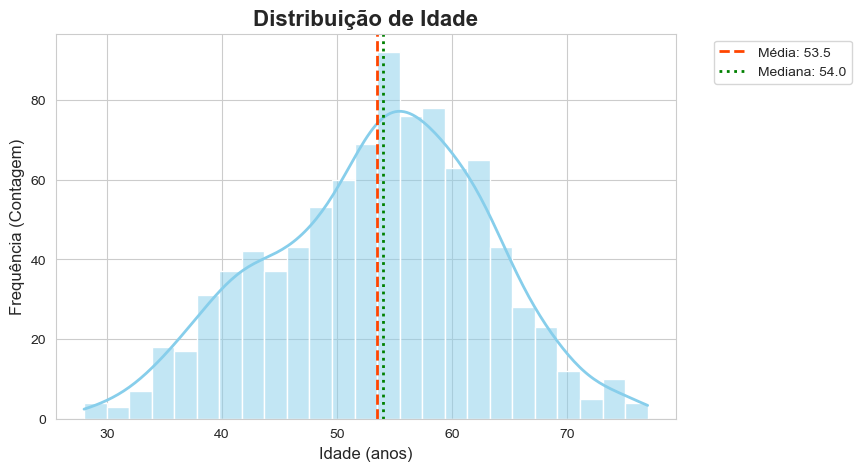

In [15]:
# Distribuição de Idade
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', kde=True, bins=25, color='skyblue', line_kws={'color': 'red', 'linewidth': 2})
# Calcula a média e a mediana
mean_age = df['age'].mean()
median_age = df['age'].median()
# Adiciona uma linha vertical para a média
plt.axvline(x=mean_age, color='orangered', linestyle='--', linewidth=2, label=f'Média: {mean_age:.1f}')
# Adiciona uma linha vertical para a mediana
plt.axvline(x=median_age,color='green',linestyle=':', linewidth=2, label=f'Mediana: {median_age:.1f}')
plt.title('Distribuição de Idade', fontsize=16, fontweight='bold')
plt.xlabel('Idade (anos)', fontsize=12)
plt.ylabel('Frequência (Contagem)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

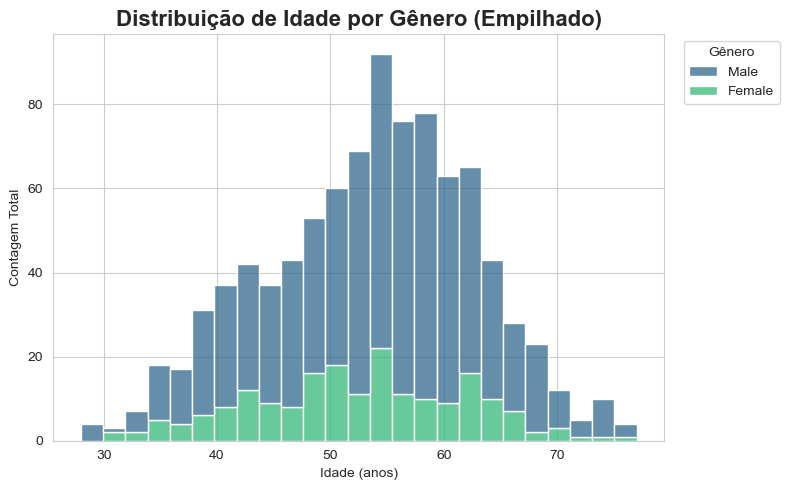

In [16]:
# 'Distribuição de Idade por Gênero
plt.figure(figsize=(8, 5))
ax = sns.histplot(data=df, x="age", hue="sex", multiple="stack", bins=25, palette='viridis')
plt.title('Distribuição de Idade por Gênero (Empilhado)', fontsize=16, fontweight='bold')
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem Total')
sns.move_legend(ax, title="Gênero", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **2. Gênero (sex)**

In [17]:
# Conta a frequência de cada categoria em 'sex'
print(df['sex'].value_counts())

sex
Male      726
Female    194
Name: count, dtype: int64


In [18]:
# Diferença entre Male x Female
male_count=726
female_count=194

diferenca = ((male_count - female_count) / female_count) * 100
print(f"O número de Homens (Male) é {diferenca:.2f}% maior que o número de mulheres (Female).")

O número de Homens (Male) é 274.23% maior que o número de mulheres (Female).


### **3. Bases de dados (dataset)**

In [19]:
# Conta a frequência de cada categoria em 'dataset'
print(df['dataset'].value_counts())

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


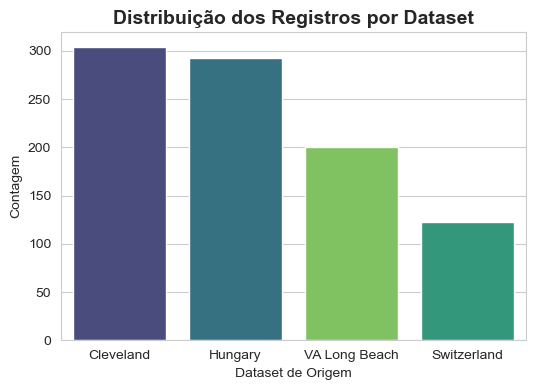

In [20]:
# Distribuição dos Registros por Dataset
plt.figure(figsize=(6,4))
sns.countplot( data=df, x='dataset', hue='dataset', palette='viridis', order=df['dataset'].value_counts().index, legend=False)
plt.title('Distribuição dos Registros por Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Dataset de Origem')
plt.ylabel('Contagem')
plt.show()

In [21]:
# Distribuição ddo gênero (sex) para cada localidade (dataset)
print(df.groupby('dataset')['sex'].value_counts().unstack())

sex            Female  Male
dataset                    
Cleveland          97   207
Hungary            81   212
Switzerland        10   113
VA Long Beach       6   194


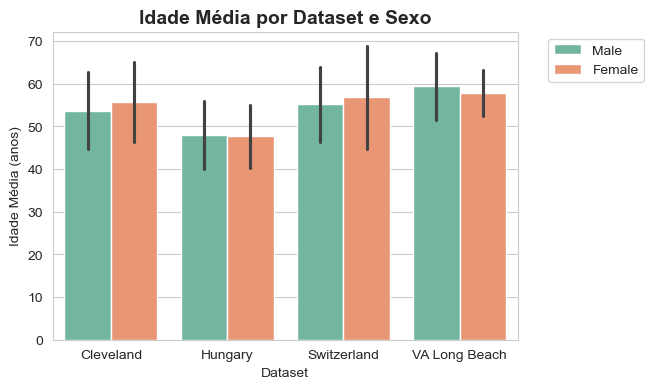

In [22]:
# Idade Média por Dataset e Sexo
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='dataset', y='age', hue='sex', palette='Set2', errorbar='sd')
plt.title('Idade Média por Dataset e Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Dataset')
plt.ylabel('Idade Média (anos)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

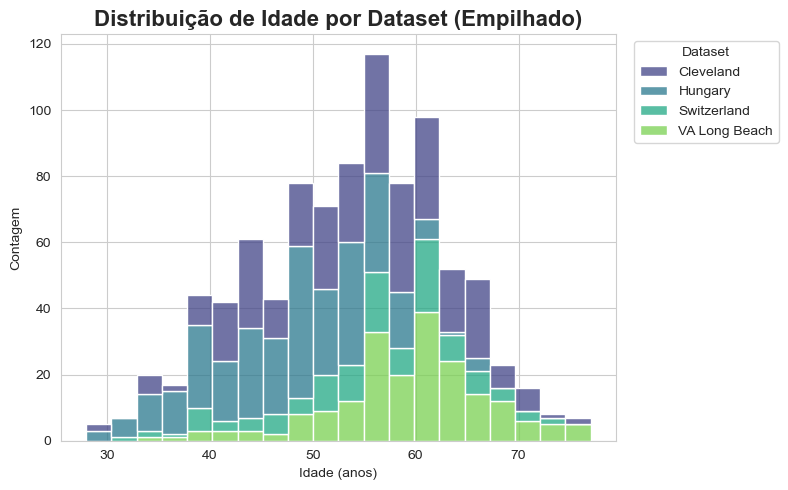

In [23]:
# Distribuição de Idade por Dataset (Empilhado)
plt.figure(figsize=(8, 5)) 
ax = sns.histplot(data=df, x='age', hue='dataset', multiple='stack', palette='viridis', bins=20)
plt.title('Distribuição de Idade por Dataset (Empilhado)', fontsize=16, fontweight='bold')
plt.xlabel('Idade (anos)')
plt.ylabel('Contagem')
sns.move_legend(ax, title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
# Estatísticas descritivas por grupo - dataset x age
age_stats = df.groupby('dataset')['age'].agg(
    media='mean',
    mediana='median',
    moda=lambda x: x.mode().values[0],  # pega a primeira moda caso haja múltiplas
    minimo='min',
    maximo='max',
    desvio_padrao='std'
).reset_index()

print(age_stats)

         dataset      media  mediana  moda  minimo  maximo  desvio_padrao
0      Cleveland  54.351974     55.5    58      28      77       9.150256
1        Hungary  47.894198     49.0    54      29      66       7.738385
2    Switzerland  55.317073     56.0    61      32      74       9.032108
3  VA Long Beach  59.350000     60.0    62      35      77       7.811697


### **4. Tipo de dor no peito (cp)**

In [25]:
# Conta a frequência de cada categoria em 'cp'
print(df['cp'].value_counts())

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


In [26]:
# Distribuição do gênero (sex) para cada tipo de dor no peito (cp)
print(df.groupby('cp')['sex'].value_counts().unstack())

sex              Female  Male
cp                           
asymptomatic         70   426
atypical angina      61   113
non-anginal          53   151
typical angina       10    36


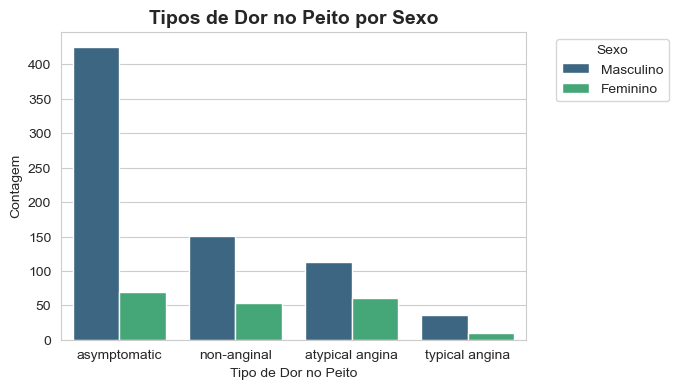

In [27]:
# Tipos de Dor no Peito por Sexo
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cp', hue='sex', palette='viridis', order=df['cp'].value_counts().index)
plt.title('Tipos de Dor no Peito por Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
# Categoria mais frequente e menos frequente da coluna 'cp'
cp_counts = df['cp'].value_counts()
most_common_cp = cp_counts.idxmax()
least_common_cp = cp_counts.idxmin()

print(f"Mais frequente: {most_common_cp} -> {cp_counts.max()}")
print(f"Menos frequente: {least_common_cp} -> {cp_counts.min()}")

Mais frequente: asymptomatic -> 496
Menos frequente: typical angina -> 46


In [29]:
# Distribuição da localidade (dataset) para cada tipo de dor no  peito (cp)
print(df.groupby('cp')['dataset'].value_counts().unstack())

dataset          Cleveland  Hungary  Switzerland  VA Long Beach
cp                                                             
asymptomatic           144      123           98            131
atypical angina         51      105            4             14
non-anginal             86       54           17             47
typical angina          23       11            4              8


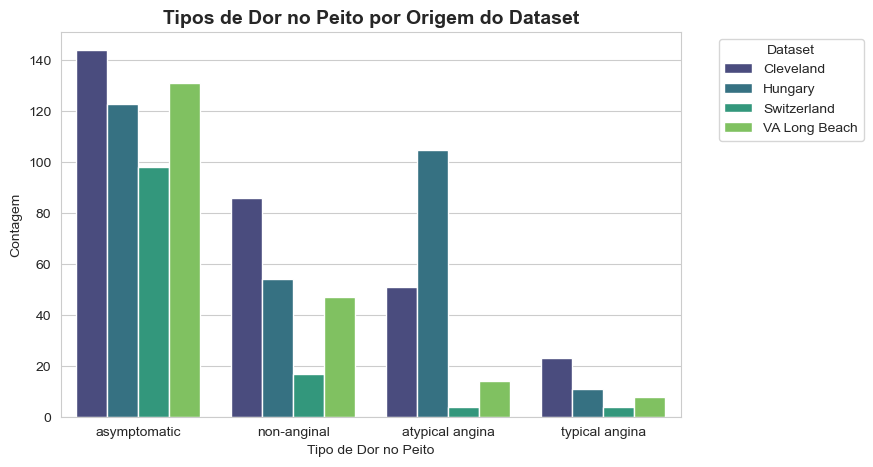

In [30]:
# Tipos de Dor no Peito por Origem do Dataset
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cp', hue='dataset', palette='viridis', order=df['cp'].value_counts().index)
plt.title('Tipos de Dor no Peito por Origem do Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Contagem')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [31]:
# Idade média por cp
print(df.groupby('cp')['age'].mean().round(2))

cp
asymptomatic       54.96
atypical angina    49.24
non-anginal        53.33
typical angina     54.83
Name: age, dtype: float64


**Interpretação:**

* Pacientes com angina atípica (atypical angina) são, em média, mais jovens (~49 anos) que os demais.
* Os outros tipos têm idade média mais próxima, entre 53 e 55 anos.

### **5. Pressão Arterial em Repouso (trestbps)**

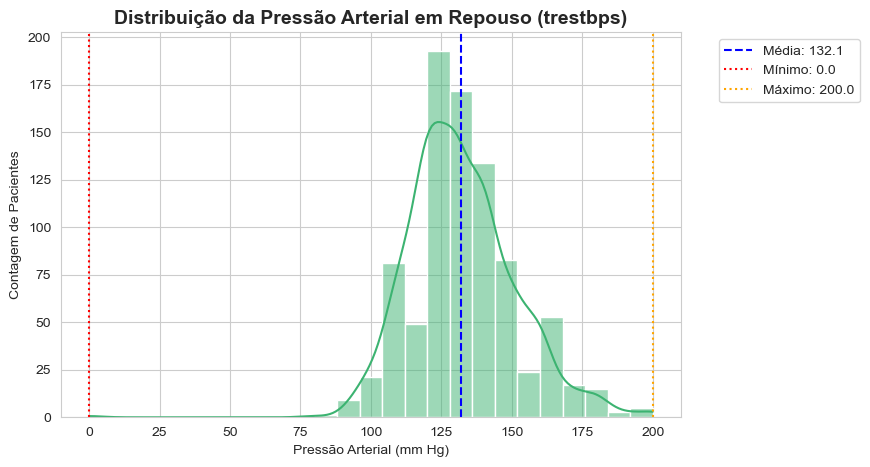

In [32]:
# Distribuição da Pressão Arterial em Repouso (trestbps)
# Estatísticas
mean_t = df['trestbps'].mean()
min_t = df['trestbps'].min()
max_t = df['trestbps'].max()

plt.figure(figsize=(8,5))
sns.histplot(df['trestbps'], kde=True, color='mediumseagreen', bins=25)
plt.axvline(mean_t, color='blue', linestyle='--', label=f'Média: {mean_t:.1f}')
plt.axvline(min_t, color='red', linestyle=':', label=f'Mínimo: {min_t}')
plt.axvline(max_t, color='orange', linestyle=':', label=f'Máximo: {max_t}')
plt.title('Distribuição da Pressão Arterial em Repouso (trestbps)', fontsize=14, fontweight='bold')
plt.xlabel('Pressão Arterial (mm Hg)')
plt.ylabel('Contagem de Pacientes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

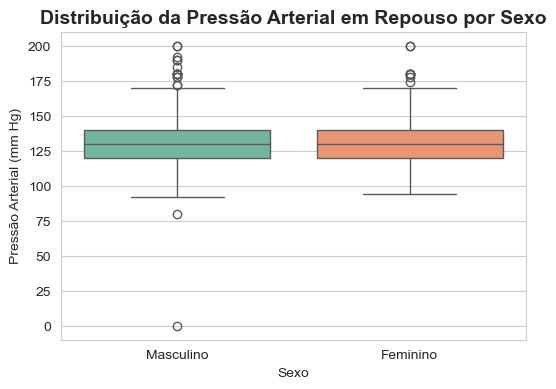

In [33]:
# Distribuição da Pressão Arterial em Repouso por Sexo
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sex', y='trestbps', hue='sex', palette='Set2', legend=False)
plt.title('Distribuição da Pressão Arterial em Repouso por Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Sexo')
plt.ylabel('Pressão Arterial (mm Hg)')
plt.xticks([0,1], ['Masculino', 'Feminino']) 
plt.show()

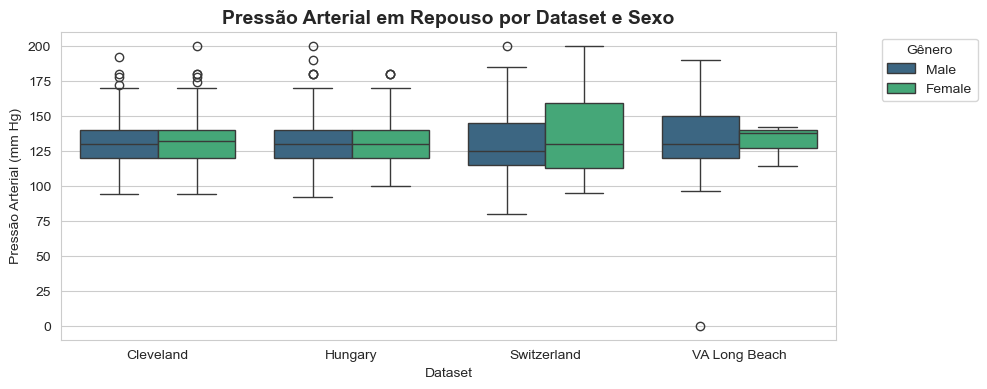

In [34]:
# Distribuição da Pressão Arterial em Repouso por Dataset e Sexo
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x='dataset', y='trestbps', hue='sex', palette='viridis')
plt.title('Pressão Arterial em Repouso por Dataset e Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Dataset')
plt.ylabel('Pressão Arterial (mm Hg)')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

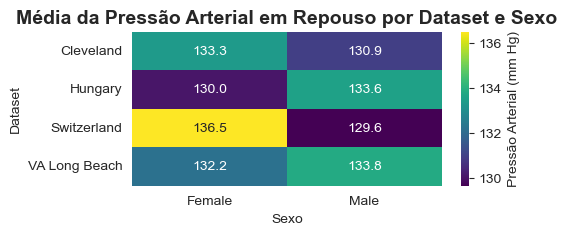

In [35]:
# Média da Pressão Arterial em Repouso por Dataset e Sexo
# Calcula a média de trestbps por dataset e sexo
mean_trestbps = df.groupby(['dataset', 'sex'])['trestbps'].mean().unstack()
plt.figure(figsize=(5,2))
sns.heatmap(mean_trestbps, annot=True, fmt=".1f", cmap="viridis", cbar_kws={'label': 'Pressão Arterial (mm Hg)'})
plt.title('Média da Pressão Arterial em Repouso por Dataset e Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Sexo')
plt.ylabel('Dataset')
plt.show()

In [36]:
# Correlação entre idade e pressão arterial em repouso
corr = df[['age', 'trestbps']].corr().loc['age', 'trestbps']
print(f"{corr:.2f}")

0.24


**Interpretação:**

* 0.24 é positivo, ou seja, conforme a idade aumenta, a pressão arterial em repouso tende a aumentar (levemente).

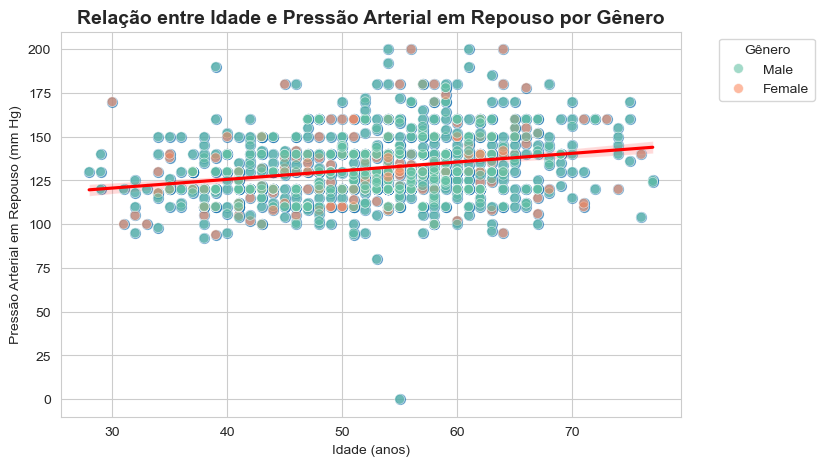

In [37]:
# Relação entre Idade e Pressão Arterial em Repouso por Gênero
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='age', y='trestbps', scatter_kws={'alpha':0.6, 's':50}, line_kws={'color':'red'})
# Adicionando cor por sexo usando scatter separado
sns.scatterplot(data=df, x='age', y='trestbps', hue='sex', palette='Set2', alpha=0.6, s=50)
plt.title('Relação entre Idade e Pressão Arterial em Repouso por Gênero', fontsize=14, fontweight='bold')
plt.xlabel('Idade (anos)')
plt.ylabel('Pressão Arterial em Repouso (mm Hg)')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **6. Colesterol (chol)**

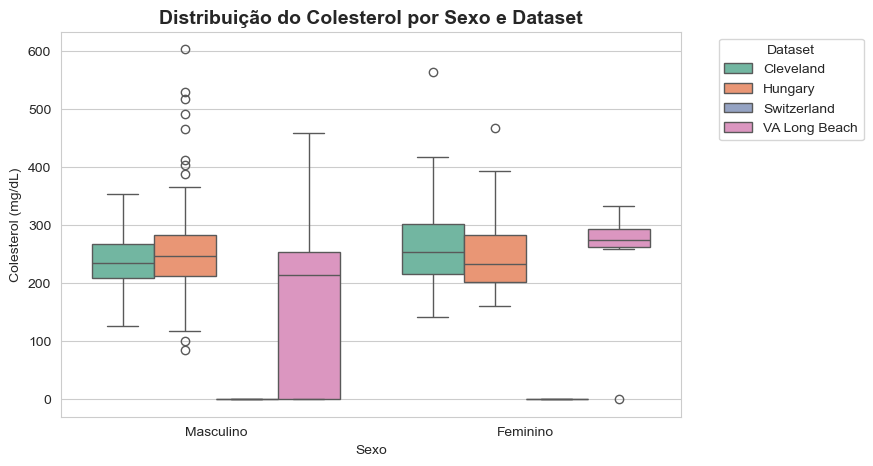

In [38]:
# Distribuição do Colesterol por Sexo e Dataset
plt.figure(figsize=(8,5))
sns.boxplot( data=df, x='sex', y='chol',  hue='dataset', palette='Set2')
plt.title('Distribuição do Colesterol por Sexo e Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Sexo')
plt.ylabel('Colesterol (mg/dL)')
plt.xticks([0,1], ['Masculino', 'Feminino'])
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc=2)  
plt.show()

In [39]:
# Contagem dos valores apenas da categoria Switzerland em dataset
print(df[df['dataset']=='Switzerland'].groupby('dataset')['chol'].value_counts())

dataset      chol
Switzerland  0.0     123
Name: count, dtype: int64


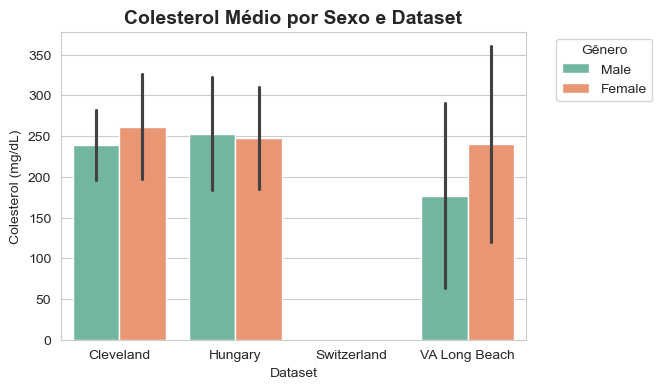

In [40]:
# Colesterol Médio por Sexo e Dataset
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='dataset', y='chol', hue='sex',  palette='Set2',  errorbar='sd')
plt.title('Colesterol Médio por Sexo e Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Dataset')
plt.ylabel('Colesterol (mg/dL)')
plt.xticks(rotation=0)
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

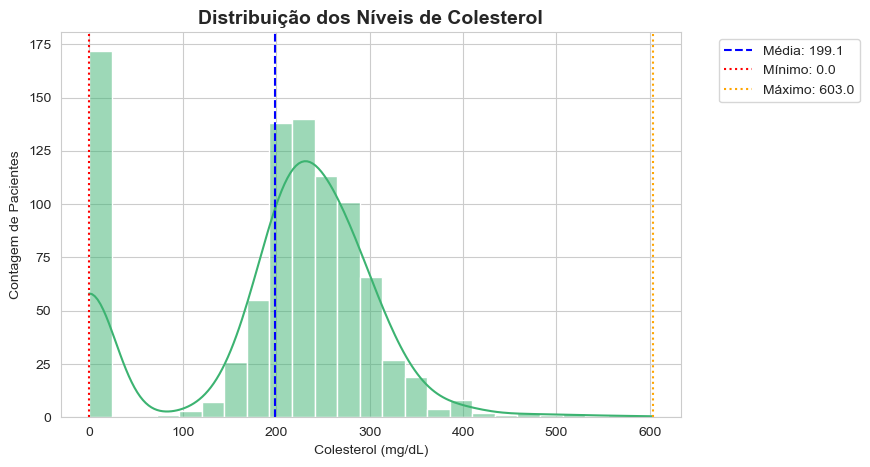

In [41]:
# Distribuição dos Níveis de Colesterol
# Estatísticas
mean_t = df['chol'].mean()
min_t = df['chol'].min()
max_t = df['chol'].max()

plt.figure(figsize=(8,5))
sns.histplot(df['chol'], kde=True, color='mediumseagreen', bins=25)
plt.axvline(mean_t, color='blue', linestyle='--', label=f'Média: {mean_t:.1f}')
plt.axvline(min_t, color='red', linestyle=':', label=f'Mínimo: {min_t}')
plt.axvline(max_t, color='orange', linestyle=':', label=f'Máximo: {max_t}')
plt.title('Distribuição dos Níveis de Colesterol', fontsize=14, fontweight='bold')
plt.xlabel('Colesterol (mg/dL)')
plt.ylabel('Contagem de Pacientes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [42]:
# Contar valores igual a O zero
zero_chol_count = (df['chol'] == 0).sum()
print(f"{zero_chol_count}")

172


In [43]:
# # Correlação entre colesterol e idade 
chol_age_corr = df[['chol', 'age']].corr().loc['chol', 'age']
print(f"{chol_age_corr:.2f}")

-0.09


**Interpretação:**

* -0,09 é Negativo, ou seja, o colesterol tende a diminuir conforme a idade aumenta.

### **7. Açúcar no Sangue em Jejum (fps)**

In [44]:
# Conta a frequência de cada categoria em 'fps'
print(df['fbs'].value_counts())

fbs
False    692
True     138
Name: count, dtype: int64


In [45]:
# Distribuição da localidade (dataset) para cada categoria de Açúcar no sangue em jejum (fps)
print(df.groupby('fbs')['dataset'].value_counts().unstack())

dataset  Cleveland  Hungary  Switzerland  VA Long Beach
fbs                                                    
False          259      265           43            125
True            45       20            5             68


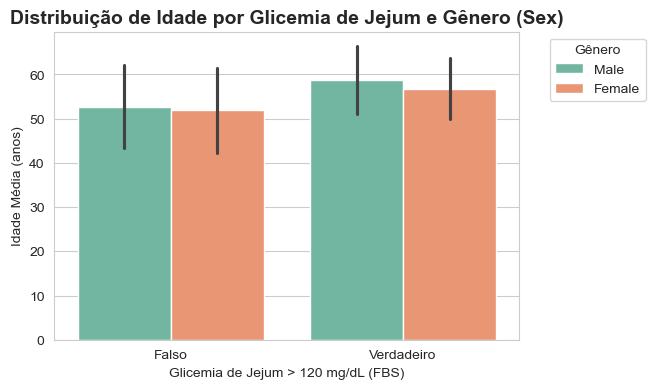

In [46]:
# Distribuição de Idade por Glicemia de Jejum e Sex
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='fbs', y='age', hue='sex', palette='Set2', errorbar='sd')
plt.title('Distribuição de Idade por Glicemia de Jejum e Gênero (Sex)', fontsize=14, fontweight='bold')
plt.xlabel('Glicemia de Jejum > 120 mg/dL (FBS)')
plt.ylabel('Idade Média (anos)')
plt.xticks([0,1], ['Falso', 'Verdadeiro'])
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **8. Resultados do Eletrocardiograma de Repouso**

In [47]:
# Conta a frequência de cada categoria em 'restecg'
print(df['restecg'].value_counts())

restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [48]:
# Média de cada categoria em 'restecg'
print(df.groupby('restecg')['age'].mean().round(2))

restecg
lv hypertrophy      56.22
normal              51.76
st-t abnormality    56.15
Name: age, dtype: float64


**Interpretação:**

* Pacientes com ECG normal (0) têm idade média de ~56 anos.
* Com anomalia ST-T (1) têm idade média de ~52 anos.
* Com hipertrofia ventricular esquerda (2) têm idade média de ~56 anos.

In [49]:
# Distribuição de gêneros (sex) para cada categoria de eletrocardiograma (restecg)
print(df.groupby('restecg')['sex'].value_counts().unstack())

sex               Female  Male
restecg                       
lv hypertrophy        47   141
normal               119   432
st-t abnormality      28   151


In [50]:
# Distribuição de bases de dados (dataset) para cada categoria de eletrocardiograma (restecg)
print(df.groupby('restecg')['dataset'].value_counts().unstack())

dataset           Cleveland  Hungary  Switzerland  VA Long Beach
restecg                                                         
lv hypertrophy          149        5            7             27
normal                  151      235           85             80
st-t abnormality          4       52           30             93


In [51]:
# Média da pressão arterial em repouso (trestbps) para cada categoria de eletrocardiograma (restecg)
print(df.groupby('restecg')['trestbps'].mean())

restecg
lv hypertrophy      134.270718
normal              130.383019
st-t abnormality    135.844595
Name: trestbps, dtype: float64


In [52]:
# Distribuição de glicemia de jejum (fbs) para cada categoria de eletrocardiograma (restecg)
print(df.groupby('restecg')['fbs'].value_counts().unstack())

fbs               False  True 
restecg                       
lv hypertrophy      145     39
normal              432     56
st-t abnormality    114     43


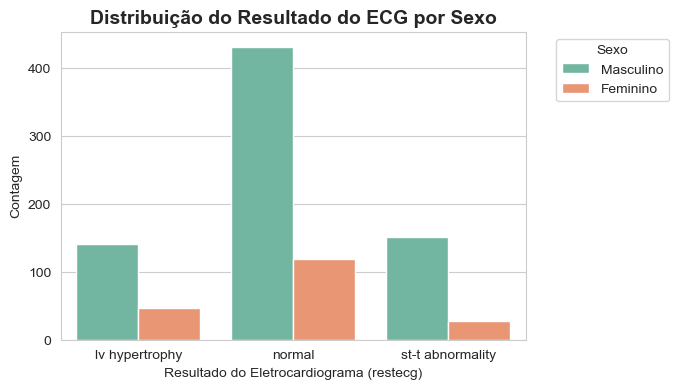

In [53]:
# Distribuição do Resultado do ECG(restecg) por Sexo
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='restecg', hue='sex', palette='Set2')
plt.title('Distribuição do Resultado do ECG por Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Resultado do Eletrocardiograma (restecg)')
plt.ylabel('Contagem')
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

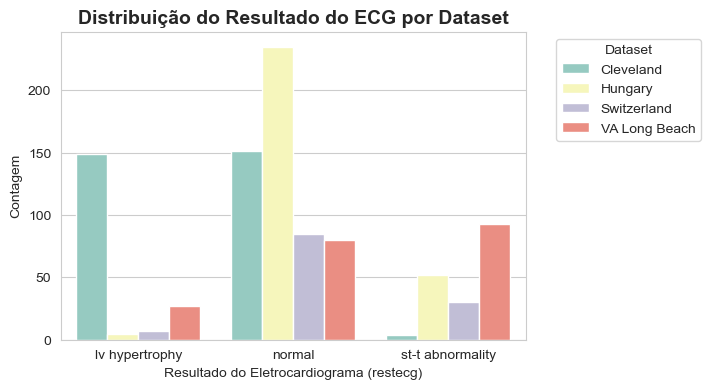

In [54]:
# Distribuição do Resultado do ECG por Dataset
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='restecg', hue='dataset', palette='Set3')
plt.title('Distribuição do Resultado do ECG por Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Resultado do Eletrocardiograma (restecg)')
plt.ylabel('Contagem')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc=2) 
plt.show()

### **9. Frequência Cardíaca Máxima (thalch)**

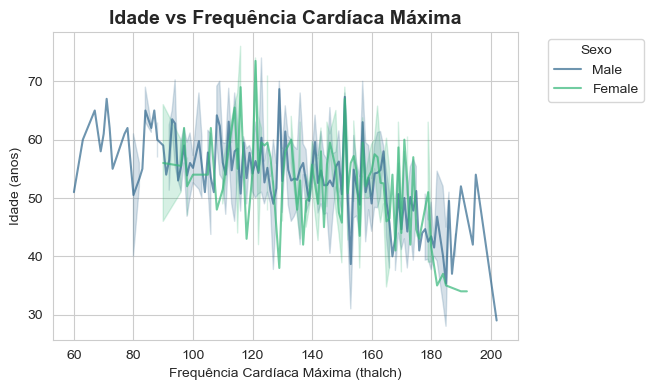

In [55]:
# Idade vs Frequência Cardíaca Máxima
plt.figure(figsize=(6,4))
sns.lineplot(data=df, x='thalch', y='age', hue='sex', palette='viridis', alpha=0.7)
plt.title('Idade vs Frequência Cardíaca Máxima', fontsize=14, fontweight='bold')
plt.xlabel('Frequência Cardíaca Máxima (thalch)')
plt.ylabel('Idade (anos)')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

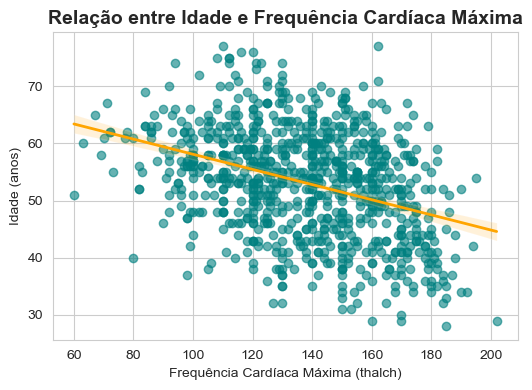

In [56]:
# Relação entre Idade e Frequência Cardíaca Máxima
plt.figure(figsize=(6,4))
sns.regplot(data=df, x='thalch', y='age', scatter_kws={'alpha':0.6, 'color':'teal'}, line_kws={'color':'orange', 'linewidth':2})
plt.title('Relação entre Idade e Frequência Cardíaca Máxima', fontsize=14, fontweight='bold')
plt.xlabel('Frequência Cardíaca Máxima (thalch)')
plt.ylabel('Idade (anos)')
plt.show()

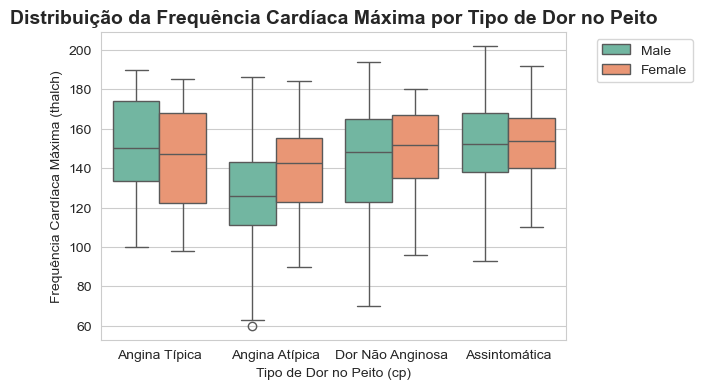

In [57]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cp', y='thalch', hue='sex', palette='Set2')
plt.title('Distribuição da Frequência Cardíaca Máxima por Tipo de Dor no Peito', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Dor no Peito (cp)')
plt.ylabel('Frequência Cardíaca Máxima (thalch)')
plt.xticks([0,1,2,3], ['Angina Típica', 'Angina Atípica', 'Dor Não Anginosa', 'Assintomática'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
# Análise descritiva básica das frequências 
print(f"A frequência cardíaca máxima (thalch) varia de {df['thalch'].min()} a {df['thalch'].max()} (excluindo NaNs).")
print(f"Média de thalch: {df['thalch'].mean():.2f}, Mediana de thalch: {df['thalch'].median():.2f}")

A frequência cardíaca máxima (thalch) varia de 60.0 a 202.0 (excluindo NaNs).
Média de thalch: 137.55, Mediana de thalch: 140.00


In [59]:
# Correlação com Tipo de dor no peito (thalch) e  Idade:
thalch_age_corr = df[['thalch', 'age']].corr().loc['thalch', 'age']
print(f"{thalch_age_corr:.2f}")

-0.37


**Obs**: Normalmente negativa, pois a frequência cardíaca máxima diminui com a idade.

### **10. Angina Induzida por Exercício (exang)**

In [60]:
# Conta a frequência de cada categoria em 'exang'
print(df['exang'].value_counts())

exang
False    528
True     337
Name: count, dtype: int64


In [61]:
# Distribuição de bases de dados (dataset) para cada categoria de Angina induzida por exercício (exang)
print(df.groupby('exang')['dataset'].value_counts().unstack())

dataset  Cleveland  Hungary  Switzerland  VA Long Beach
exang                                                  
False          205      203           68             52
True            99       89           54             95


In [62]:
# Distribuição dos gêneros (sex) para cada categoria de Angina induzida por exercício (exang)
print(df.groupby('exang')['sex'].value_counts().unstack())

sex    Female  Male
exang              
False     149   379
True       43   294


In [63]:
# Média da idade (age) dos pacientes para cada categoria de angina induzida por exercício (exang)
print(df.groupby('exang')['age'].mean())

exang
False    51.623106
True     55.504451
Name: age, dtype: float64


**Interpretação:** 
* Pacientes sem angina induzida por exercício (exang=0) têm idade média de ~52 anos.
* Pacientes com angina induzida (exang=1) têm idade média de ~56 anos.

In [64]:
# Média da frequência cardíaca máxima alcançada (thalch) para cada categoria de angina induzida por exercício (exang).
print(df.groupby('exang')['thalch'].mean())

exang
False    144.924242
True     125.985163
Name: thalch, dtype: float64


**Interpretação:**

* Pacientes sem angina induzida (exang=0) atingem, em média, ~145 bpm.
* Pacientes com angina induzida (exang=1) atingem, em média, ~126 bpm.

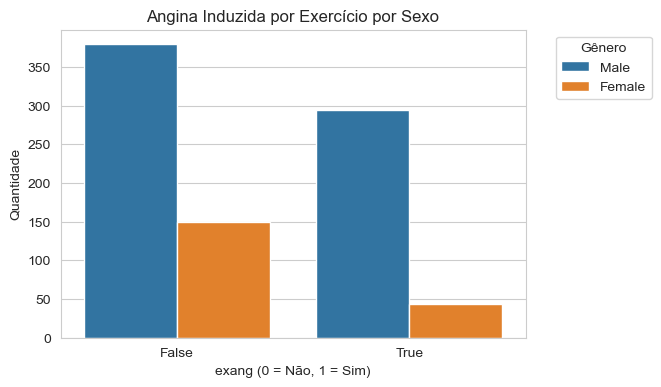

In [65]:
# Angina Induzida por Exercício por Sex
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='exang', hue='sex')
plt.title('Angina Induzida por Exercício por Sexo')
plt.xlabel('exang (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

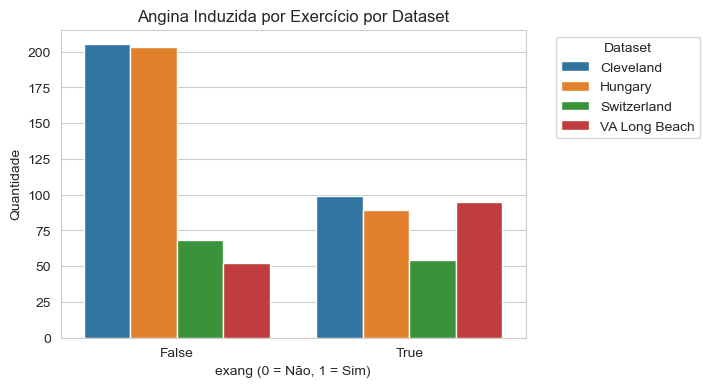

In [66]:
# Angina Induzida por Exercício por Dataset
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='exang', hue='dataset')
plt.title('Angina Induzida por Exercício por Dataset')
plt.xlabel('exang (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

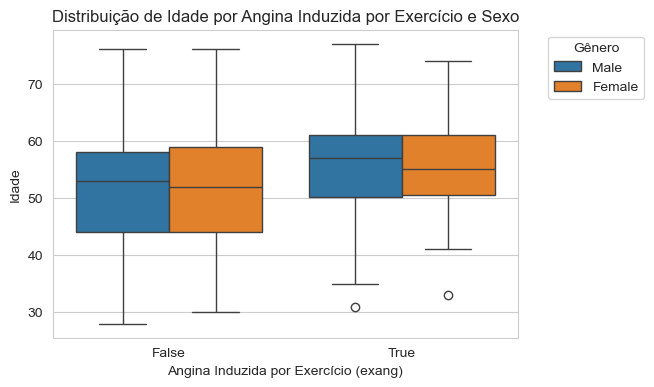

In [67]:
# Distribuição de Idade por Angina Induzida por Exercício e Sexo
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='exang', y='age', hue='sex')
plt.title('Distribuição de Idade por Angina Induzida por Exercício e Sexo')
plt.xlabel('Angina Induzida por Exercício (exang)')
plt.ylabel('Idade')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

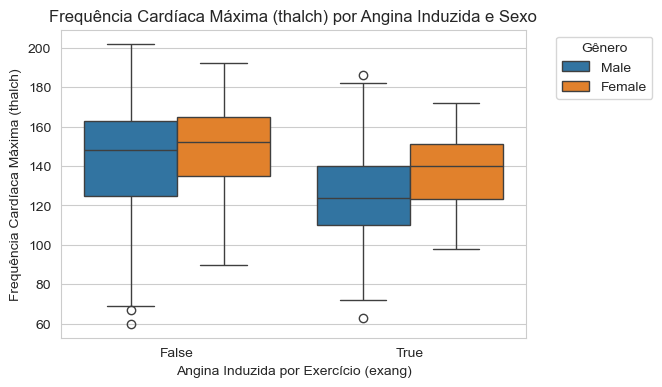

In [68]:
# Frequência Cardíaca Máxima (thalch) por Angina Induzida e Sexo
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='exang', y='thalch', hue='sex')
plt.title('Frequência Cardíaca Máxima (thalch) por Angina Induzida e Sexo')
plt.xlabel('Angina Induzida por Exercício (exang)')
plt.ylabel('Frequência Cardíaca Máxima (thalch)')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [69]:
# Quantos pacientes com e sem angina induzida (exang) existem em cada grupo de presença de doença cardíaca (num).
num_exang_counts = pd.crosstab(df['num'], df['exang'])
print(num_exang_counts)

exang  False  True 
num                
0        336     55
1        107    145
2         44     58
3         30     64
4         11     15


In [70]:
# Percentual de exang dentro de cada grupo num
num_exang_percent = num_exang_counts.div(num_exang_counts.sum(axis=1), axis=0) * 100
num_exang_percent = num_exang_percent.round(2)
print(num_exang_percent)

exang  False  True 
num                
0      85.93  14.07
1      42.46  57.54
2      43.14  56.86
3      31.91  68.09
4      42.31  57.69


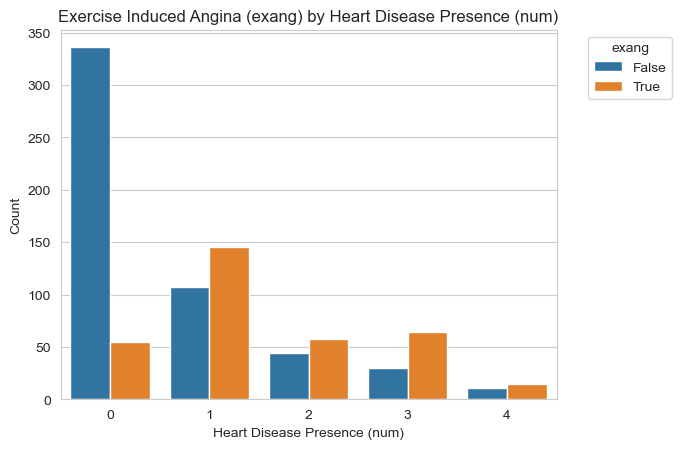

In [71]:
# Exercise Induced Angina (exang) by Heart Disease Presence (num)
sns.countplot(data=df, x='num', hue='exang')
plt.title('Exercise Induced Angina (exang) by Heart Disease Presence (num)')
plt.xlabel('Heart Disease Presence (num)')
plt.ylabel('Count')
plt.legend(title='exang', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **11. Depressão do segmento ST(oldpeak)**

In [72]:
# Estatísticas descritivas de Oldpeak por gênero (sex)
stats_oldpeak = df.groupby('sex')['oldpeak'].agg(['mean', 'median', 'std']).round(2)
stats_oldpeak = stats_oldpeak.rename(columns={'mean': 'Média', 'median': 'Mediana', 'std': 'Desvio Padrão'})
print(stats_oldpeak)

        Média  Mediana  Desvio Padrão
sex                                  
Female   0.67      0.0           0.96
Male     0.94      0.6           1.12


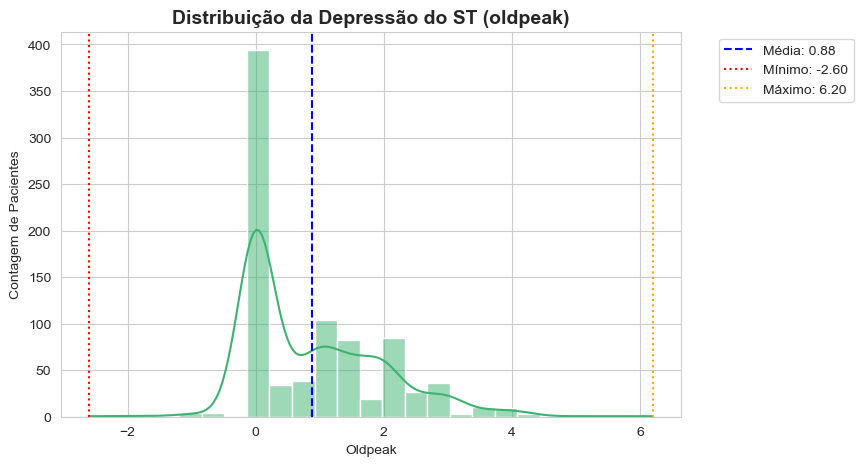

In [73]:
# Distribuição do Oldpeak (Depressão do Segmento ST)
# Cálculo de estatísticas de Oldpeak
mean_o = df['oldpeak'].mean()
min_o = df['oldpeak'].min()
max_o = df['oldpeak'].max()

plt.figure(figsize=(8,5))
sns.histplot(df['oldpeak'], kde=True, color='mediumseagreen', bins=25)
plt.axvline(mean_o, color='blue', linestyle='--', label=f'Média: {mean_o:.2f}')
plt.axvline(min_o, color='red', linestyle=':', label=f'Mínimo: {min_o:.2f}')
plt.axvline(max_o, color='orange', linestyle=':', label=f'Máximo: {max_o:.2f}')
plt.title('Distribuição da Depressão do ST (oldpeak)', fontsize=14, fontweight='bold')
plt.xlabel('Oldpeak')
plt.ylabel('Contagem de Pacientes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

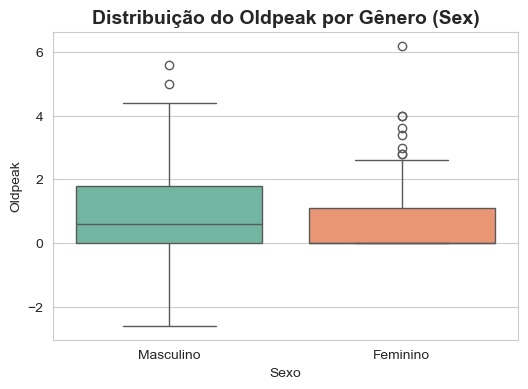

In [74]:
# Distribuição do Oldpeak por Gênero (Sex)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sex', y='oldpeak', hue='sex', palette='Set2', legend=False)
plt.title('Distribuição do Oldpeak por Gênero (Sex)', fontsize=14, fontweight='bold')
plt.xlabel('Sexo')
plt.ylabel('Oldpeak')
plt.xticks([0,1], ['Masculino', 'Feminino']) 
plt.show()

In [76]:
# Estatísticas descritiva de Oldpeak por Conjunto de Dados (dataset)
stats_dataset = df.groupby('dataset')['oldpeak'].agg(['mean','median','std']).round(2)
stats_dataset = stats_dataset.rename(columns={'mean':'Média','median':'Mediana','std':'Desvio Padrão'})
print(stats_dataset)

               Média  Mediana  Desvio Padrão
dataset                                     
Cleveland       1.04      0.8           1.16
Hungary         0.59      0.0           0.91
Switzerland     0.65      0.3           1.06
VA Long Beach   1.32      1.5           1.11


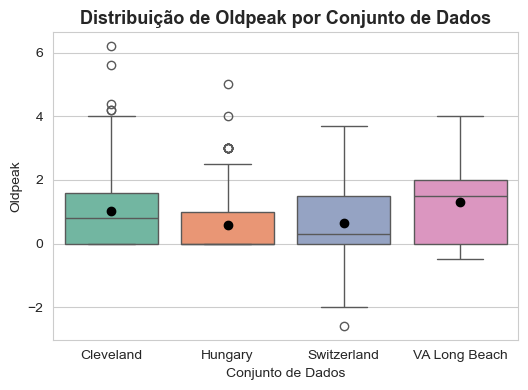

In [77]:
# Distribuição de Oldpeak por Conjunto de Dados
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='dataset', y='oldpeak', hue='dataset', palette="Set2", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.title('Distribuição de Oldpeak por Conjunto de Dados', fontsize=13, fontweight='bold')
plt.xlabel('Conjunto de Dados')
plt.ylabel('Oldpeak')
plt.show()

In [78]:
# Estatísticas descritiva de Oldpeak por Tipo de Dor no Peito (cp)
stats_cp = df.groupby('cp')['oldpeak'].agg(['mean','median','std']).round(2)
stats_cp = stats_cp.rename(columns={'mean':'Média','median':'Mediana','std':'Desvio Padrão'})
print(stats_cp)

                 Média  Mediana  Desvio Padrão
cp                                            
asymptomatic      1.16      1.0           1.16
atypical angina   0.30      0.0           0.62
non-anginal       0.64      0.0           0.96
typical angina    1.07      0.9           1.16


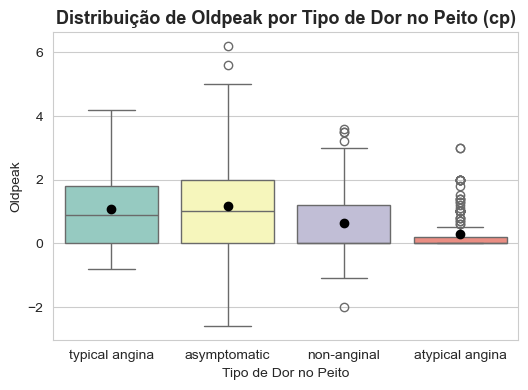

In [79]:
# Distribuição de Oldpeak por Tipo de Dor no Peito (cp)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='cp', y='oldpeak', hue='cp', palette="Set3", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.title('Distribuição de Oldpeak por Tipo de Dor no Peito (cp)', fontsize=13, fontweight='bold')
plt.xlabel('Tipo de Dor no Peito')
plt.ylabel('Oldpeak')
plt.show()

In [80]:
# Estatísticas descritivas de Oldpeak por Angina Induzida por Exercício
stats_exang = df.groupby('exang')['oldpeak'].agg(['mean','median','std']).round(2)
stats_exang = stats_exang.rename(columns={'mean':'Média','median':'Mediana','std':'Desvio Padrão'})
print(stats_exang)

       Média  Mediana  Desvio Padrão
exang                               
False   0.54      0.0           0.94
True    1.41      1.5           1.10


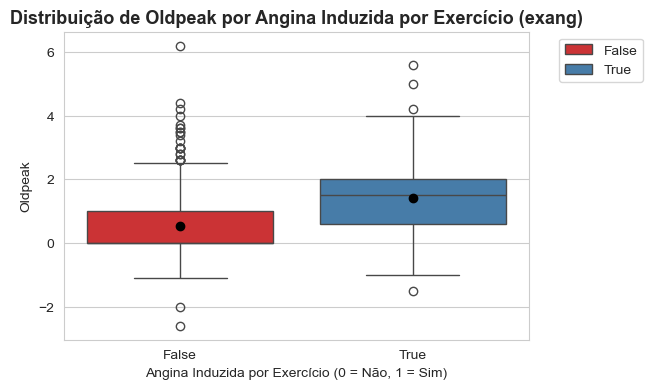

In [81]:
# Distribuição de Oldpeak por Angina Induzida por Exercício (exang)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='exang', y='oldpeak', hue='exang', palette="Set1", showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.title('Distribuição de Oldpeak por Angina Induzida por Exercício (exang)', fontsize=13, fontweight='bold')
plt.xlabel('Angina Induzida por Exercício (0 = Não, 1 = Sim)')
plt.ylabel('Oldpeak')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [82]:
# Correlação de Oldpeak com idade (age) e frequência cardíaca máxima (thalch)
oldpeak_corr = df[['oldpeak', 'age', 'thalch']].corr()
print(oldpeak_corr['oldpeak'][['age', 'thalch']].round(2))

age       0.26
thalch   -0.15
Name: oldpeak, dtype: float64


**Interpretação:**

* age (idade) tem correlação positiva → quanto maior a idade, maior a tendência de elevação do Oldpeak.
* thalch (frequência cardíaca máxima) tem correlação negativa → quanto maior o esforço cardíaco, menor o Oldpeak.

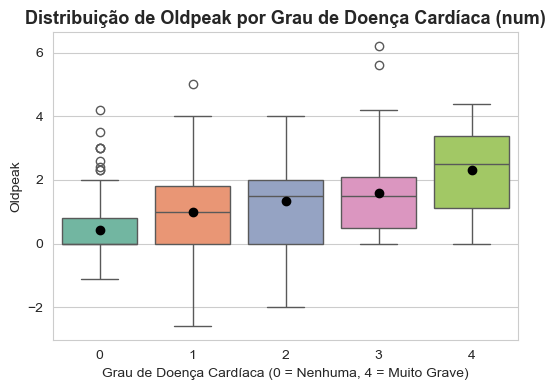

In [83]:
# Distribuição de Oldpeak por Presença de Doença Cardíaca (num)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='num', y='oldpeak', hue='num', palette="Set2", showmeans=True, legend=False,
            meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
plt.title('Distribuição de Oldpeak por Grau de Doença Cardíaca (num)', fontsize=13, fontweight='bold')
plt.xlabel('Grau de Doença Cardíaca (0 = Nenhuma, 4 = Muito Grave)')
plt.ylabel('Oldpeak')
plt.show()

In [84]:
# Média de Oldpeak por Conjunto de Dados e Sexo
mean_oldpeak = df.groupby(['dataset', 'sex'])['oldpeak'].mean().unstack().round(2)
mean_oldpeak = mean_oldpeak.rename(columns={0: 'Feminino', 1: 'Masculino'})
print(mean_oldpeak)

sex            Female  Male
dataset                    
Cleveland        0.87  1.12
Hungary          0.41  0.66
Switzerland      0.81  0.64
VA Long Beach    0.70  1.34


### **12. Inclinação do segmento ST no esforço máximo (slope)**

In [85]:
# Contagem de valores para slope:
print(df['slope'].value_counts(dropna=False))

slope
flat           345
NaN            309
upsloping      203
downsloping     63
Name: count, dtype: int64


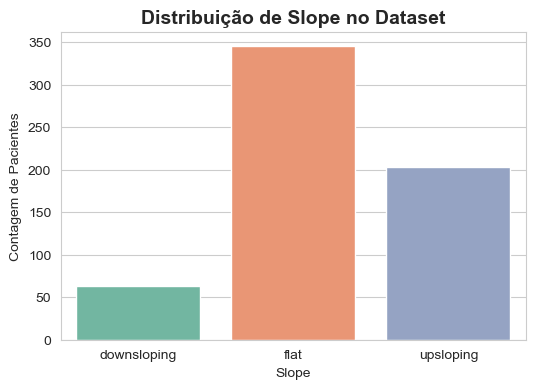

In [86]:
# Distribuição de Slope no Dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='slope', hue='slope', palette="Set2", legend=False)
plt.title('Distribuição de Slope no Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Slope')
plt.ylabel('Contagem de Pacientes')
plt.show()

In [87]:
# Distribuição de sexo por slope
print(df.groupby('slope')['sex'].value_counts().unstack())

sex          Female  Male
slope                    
downsloping       7    56
flat             69   276
upsloping        57   146


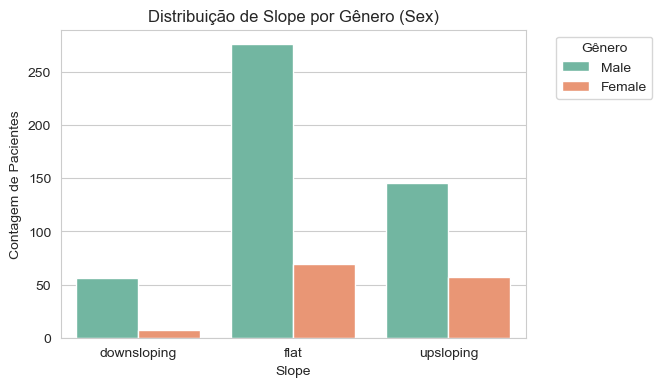

In [88]:
# Distribuição de Slope por Gênero (Sex)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='slope', hue='sex', palette="Set2")
plt.title('Distribuição de Slope por Gênero (Sex)')
plt.xlabel('Slope')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [89]:
# Distribuição do tipo de dor no peito por slope
print(df.groupby('slope')['cp'].value_counts().unstack())

cp           asymptomatic  atypical angina  non-anginal  typical angina
slope                                                                  
downsloping            46                3           10               4
flat                  242               28           59              16
upsloping              89               44           58              12


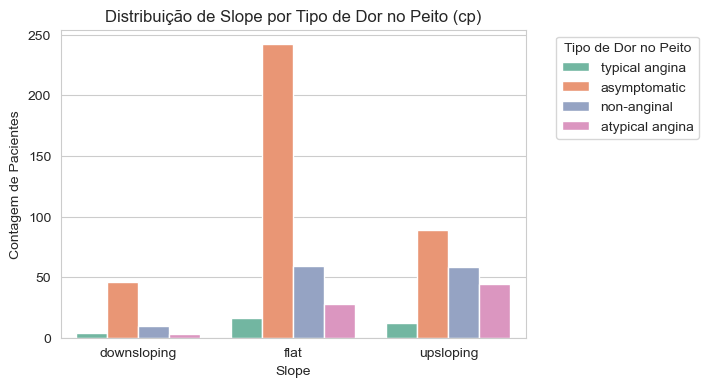

In [90]:
# Distribuição de Slope por Tipo de Dor no Peito (cp)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='slope', hue='cp', palette="Set2")
plt.title('Distribuição de Slope por Tipo de Dor no Peito (cp)')
plt.xlabel('Slope')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Tipo de Dor no Peito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

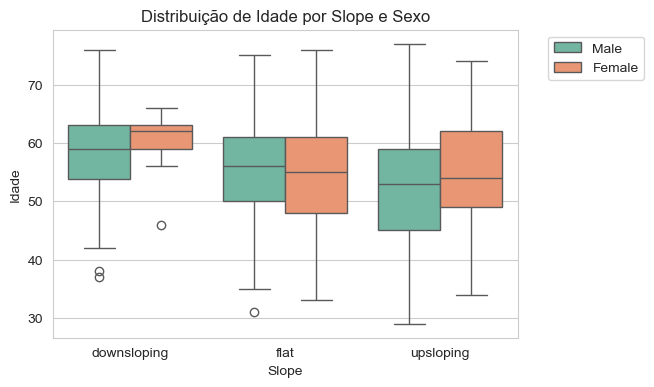

In [91]:
# Distribuição de Idade por Slope e Gênero (sex)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='slope', y='age', hue='sex', palette="Set2")
plt.title('Distribuição de Idade por Slope e Sexo')
plt.xlabel('Slope')
plt.ylabel('Idade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

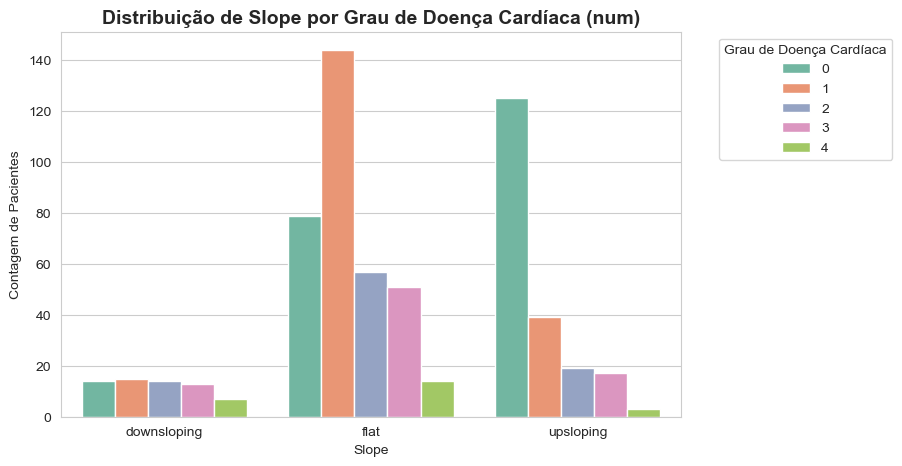

In [92]:
# Distribuição de Slope por Grau de Doença Cardíaca (num)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='slope', hue='num', palette='Set2')
plt.title('Distribuição de Slope por Grau de Doença Cardíaca (num)', fontsize=14, fontweight='bold')
plt.xlabel('Slope')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Grau de Doença Cardíaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **13. Número de vasos principais (ca)**

In [93]:
# Quantidade de vasos principais (ca)
print(df['ca'].value_counts())

ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64


In [94]:
# Distribuição do nº de vasos principais (ca) por gênero (sex)
print(df.groupby('ca')['sex'].value_counts().unstack())

sex  Female  Male
ca               
0.0      65   116
1.0      15    52
2.0      13    28
3.0       4    16


In [95]:
# Distribuição do nº de vasos principais (ca) por base de dados (dataset)
print(df.groupby('ca')['dataset'].value_counts().unstack())

dataset  Cleveland  Hungary  Switzerland  VA Long Beach
ca                                                     
0.0          176.0      3.0          NaN            2.0
1.0           65.0      NaN          2.0            NaN
2.0           38.0      NaN          3.0            NaN
3.0           20.0      NaN          NaN            NaN


In [96]:
# Média de colesterol por número de vasos (ca)
print(df.groupby('ca')['chol'].mean().round(2))

ca
0.0    240.39
1.0    240.72
2.0    235.83
3.0    265.45
Name: chol, dtype: float64


In [97]:
# Média de Oldpeak por número de vasos (ca)
print(df.groupby('ca')['oldpeak'].mean().round(2))

ca
0.0    0.83
1.0    1.02
2.0    1.60
3.0    1.86
Name: oldpeak, dtype: float64


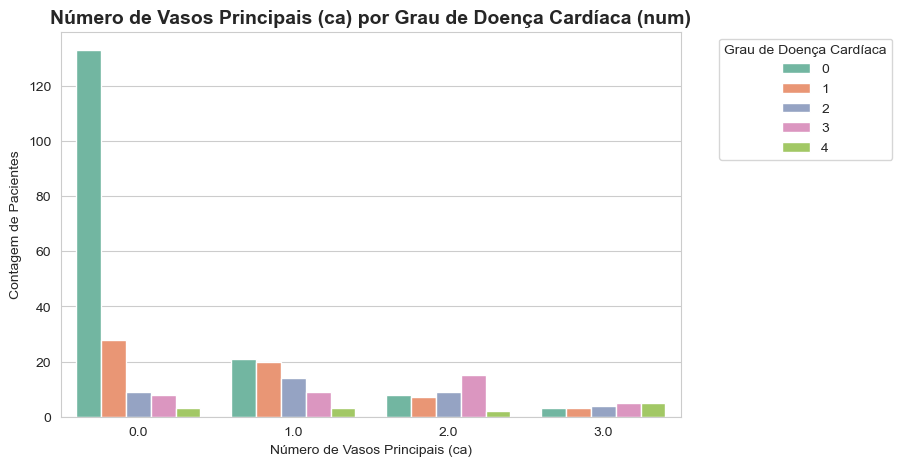

In [98]:
# Número de Vasos Principais (ca) por Grau de Doença Cardíaca (num)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ca', hue='num', palette='Set2')
plt.title('Número de Vasos Principais (ca) por Grau de Doença Cardíaca (num)', fontsize=14, fontweight='bold')
plt.xlabel('Número de Vasos Principais (ca)')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Grau de Doença Cardíaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **14. Talassemia (thal)**

In [99]:
# Contagem de valores de thal
print(df['thal'].value_counts())

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64


In [100]:
# Distribuição de sexo por categoria de thal
print(df.groupby('thal')['sex'].value_counts().unstack())

sex                Female  Male
thal                           
fixed defect            4    42
normal                 86   110
reversable defect      21   171


In [101]:
# Distribuição de dataset por thal
print(df.groupby('thal')['dataset'].value_counts().unstack())

dataset            Cleveland  Hungary  Switzerland  VA Long Beach
thal                                                             
fixed defect              18       10           10              8
normal                   166        7           19              4
reversable defect        117       11           42             22


In [102]:
# Idade média por thal
print(df.groupby('thal')['age'].mean().round(2))

thal
fixed defect         54.35
normal               53.20
reversable defect    55.92
Name: age, dtype: float64


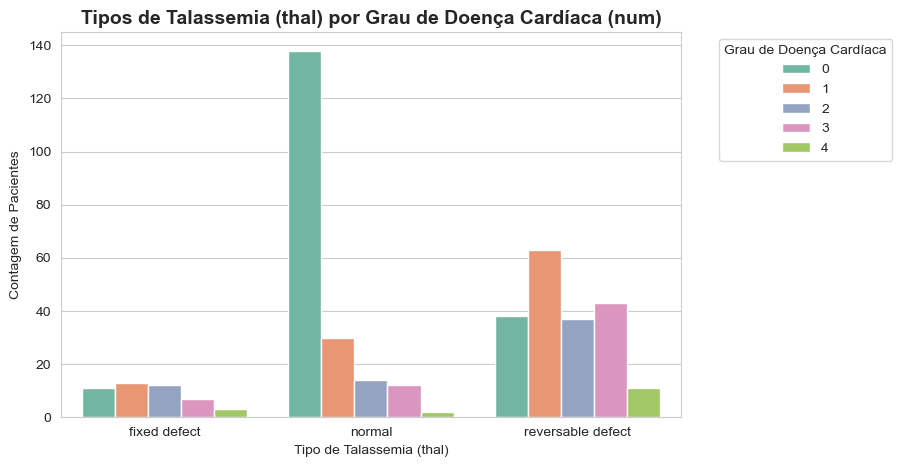

In [103]:
# Tipos de Talassemia (thal) por Grau de Doença Cardíaca (num)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='thal', hue='num', palette='Set2')
plt.title('Tipos de Talassemia (thal) por Grau de Doença Cardíaca (num)', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Talassemia (thal)')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Grau de Doença Cardíaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### **15. Atributo-alvo – presença de doença cardíaca (num)**

In [104]:
# Contagem de pacientes por grau de doença cardíaca
print(df['num'].value_counts())

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [105]:
# Idade média por grau de doença cardíaca
print(df.groupby('num')['age'].mean().round(2))

num
0    50.55
1    53.53
2    57.58
3    59.21
4    59.21
Name: age, dtype: float64


In [106]:
# Distribuição de sexo por grau de doença cardíaca
print(df.groupby('num')['sex'].value_counts().unstack())

sex  Female  Male
num              
0       144   267
1        30   235
2        10    99
3         8    99
4         2    26


In [107]:
# Distribuição de dataset por grau de doença cardíaca
print(df.groupby('num')['dataset'].value_counts().unstack())

dataset  Cleveland  Hungary  Switzerland  VA Long Beach
num                                                    
0            165.0    187.0          8.0           51.0
1             55.0    106.0         48.0           56.0
2             36.0      NaN         32.0           41.0
3             35.0      NaN         30.0           42.0
4             13.0      NaN          5.0           10.0


In [108]:
# Média de colesterol por grau de doença cardíaca
print(df.groupby('num')['chol'].mean().round(2))

num
0    227.91
1    195.26
2    143.86
3    159.72
4    192.15
Name: chol, dtype: float64


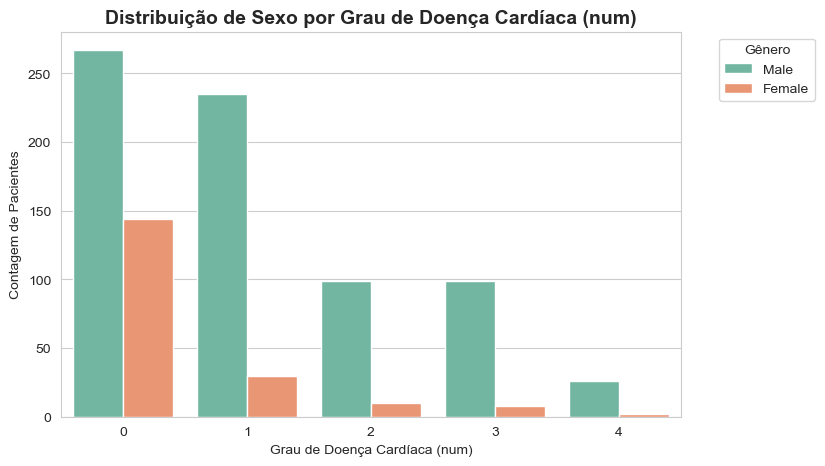

In [109]:
# Distribuição de Sexo por Grau de Doença Cardíaca (num)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='num', hue='sex', palette='Set2')
plt.title('Distribuição de Sexo por Grau de Doença Cardíaca (num)', fontsize=14, fontweight='bold')
plt.xlabel('Grau de Doença Cardíaca (num)')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

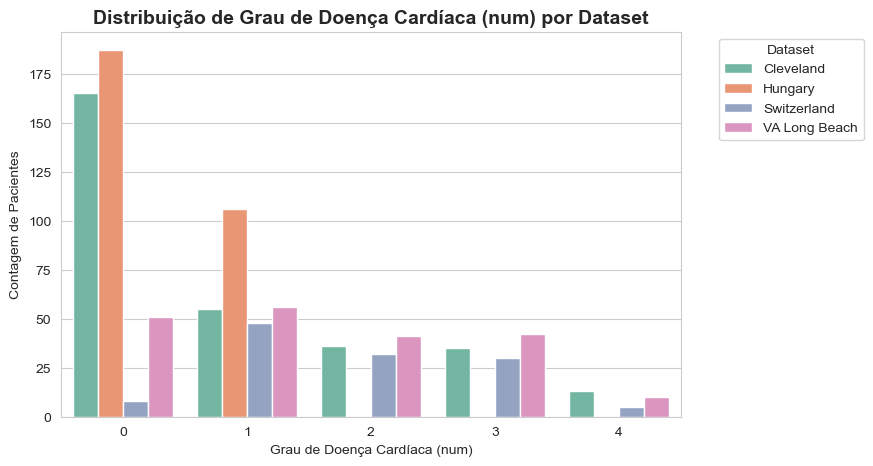

In [110]:
# Distribuição de Grau de Doença Cardíaca (num) por Dataset
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='num', hue='dataset', palette='Set2')
plt.title('Distribuição de Grau de Doença Cardíaca (num) por Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Grau de Doença Cardíaca (num)')
plt.ylabel('Contagem de Pacientes')
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [111]:
# Carregando a extensão watermark
%reload_ext watermark

In [112]:
# Imprimir
# -a (autor do projeto)
# -v (versões do Python e do IPython)
# -m (informações sobre a máquina (hardware e sistema operacional))
# --iversions (versões de pacotes importadas (import))
agora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
%watermark -a "Patrick F. R. Ribeiro" -v -m --iversions
print(f"Última atualização: {agora}")

Author: Patrick F. R. Ribeiro

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 8.30.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

plotly    : 5.24.1
seaborn   : 0.13.2
matplotlib: 3.10.0
pandas    : 2.2.3
numpy     : 1.26.4

Última atualização: 2025-09-19 19:51:27
